In [50]:
## load the libraries
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np
from keras.datasets import mnist

In [51]:
### read dataset
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/input/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values 
train_y = train['label'].values
## normalize and reshape the predictors
train_x = train_x / 255
## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)
## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [52]:
## input layer
input_layer = Input(shape=(784,))
## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)
## latent view
latent_view = Dense(10, activation='sigmoid')(encode_layer3)
## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)
## output layer
output_layer = Dense(784)(decode_layer3)
model = Model(input_layer, output_layer)

In [53]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_10 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5010      
_________________________________________________________________
dense_12 (Dense)             (None, 500)               5500      
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              5010

In [54]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 2s 60ms/step - loss: 0.0952 - val_loss: 0.0710
Epoch 2/20
24/24 [==============================] - 1s 52ms/step - loss: 0.0633 - val_loss: 0.0529
Epoch 3/20
24/24 [==============================] - 1s 52ms/step - loss: 0.0455 - val_loss: 0.0401
Epoch 4/20
24/24 [==============================] - 1s 53ms/step - loss: 0.0385 - val_loss: 0.0367
Epoch 5/20
24/24 [==============================] - 1s 51ms/step - loss: 0.0347 - val_loss: 0.0326
Epoch 6/20
24/24 [==============================] - 1s 53ms/step - loss: 0.0315 - val_loss: 0.0299
Epoch 7/20
24/24 [==============================] - 1s 52ms/step - loss: 0.0286 - val_loss: 0.0267
Epoch 8/20
24/24 [==============================] - 1s 52ms/step - loss: 0.0265 - val_loss: 0.0253
Epoch 9/20
24/24 [==============================] - 1s 52ms/step - loss: 0.0250 - val_loss: 0.0240
Epoch 10/20
24/24 [==============================] - 1s 52ms/step - loss: 0.0238 - val_loss: 0.0232
Epoch 11/

In [55]:
preds = model.predict(val_x)


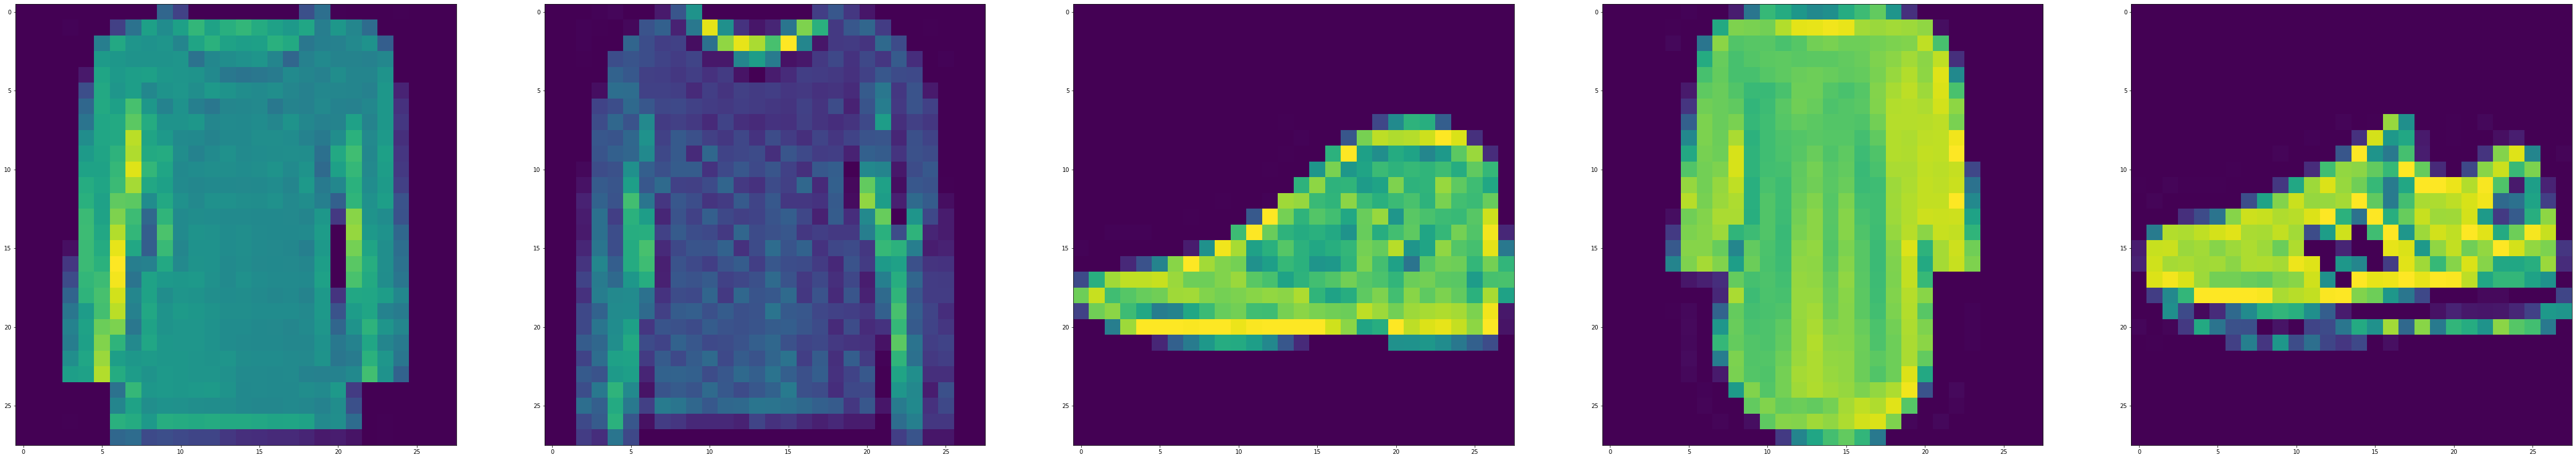

In [56]:
from PIL import Image
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
  ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

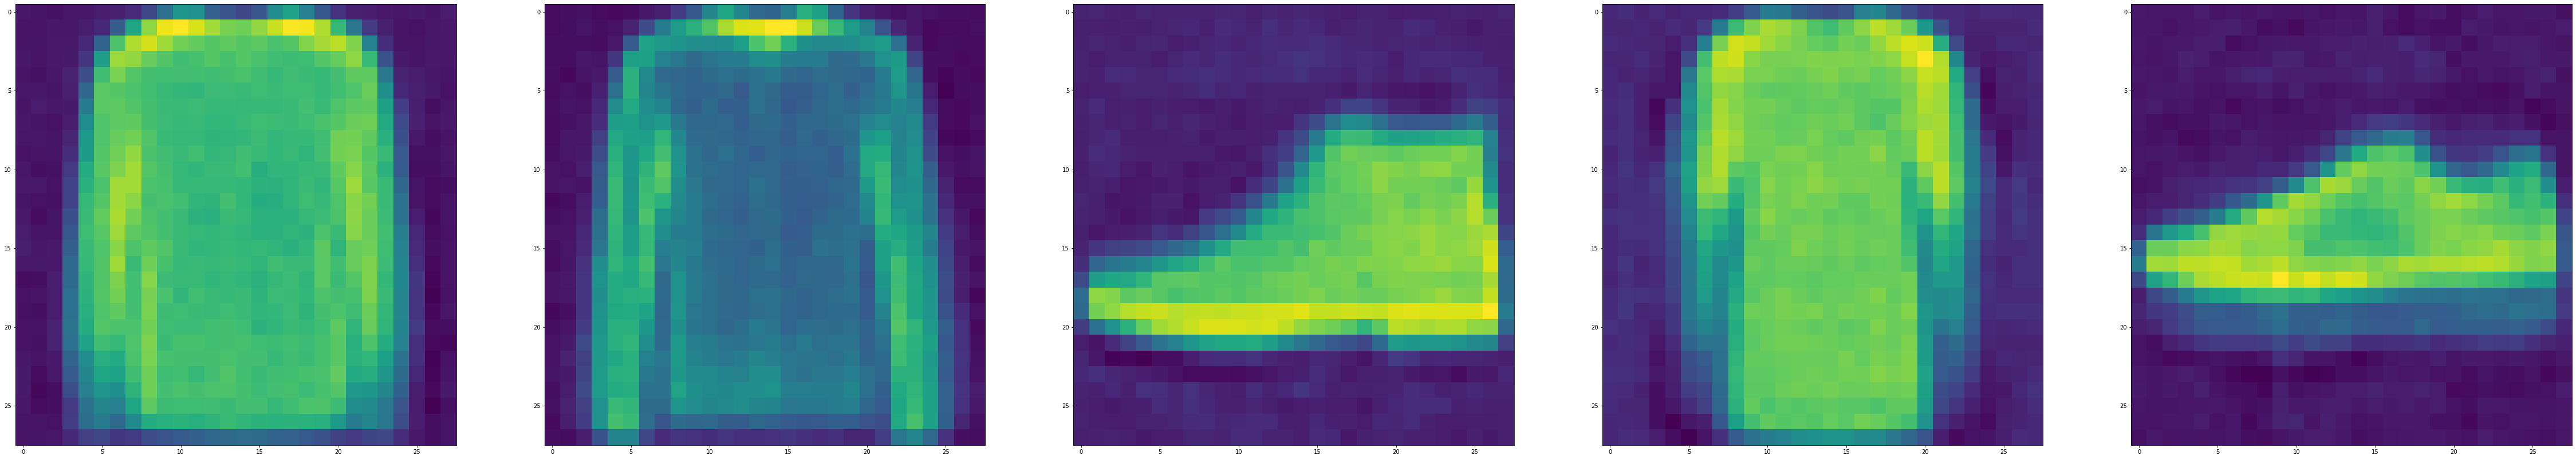

In [57]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
  ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

In [58]:
##recreate the train_x array and val_x array
train_x = train[list(train.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)
## normalize and reshape
train_x = train_x/255. 
val_x = val_x/255. 

In [59]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

In [60]:
# Lets add sample noise - Salt and Pepper
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])
train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

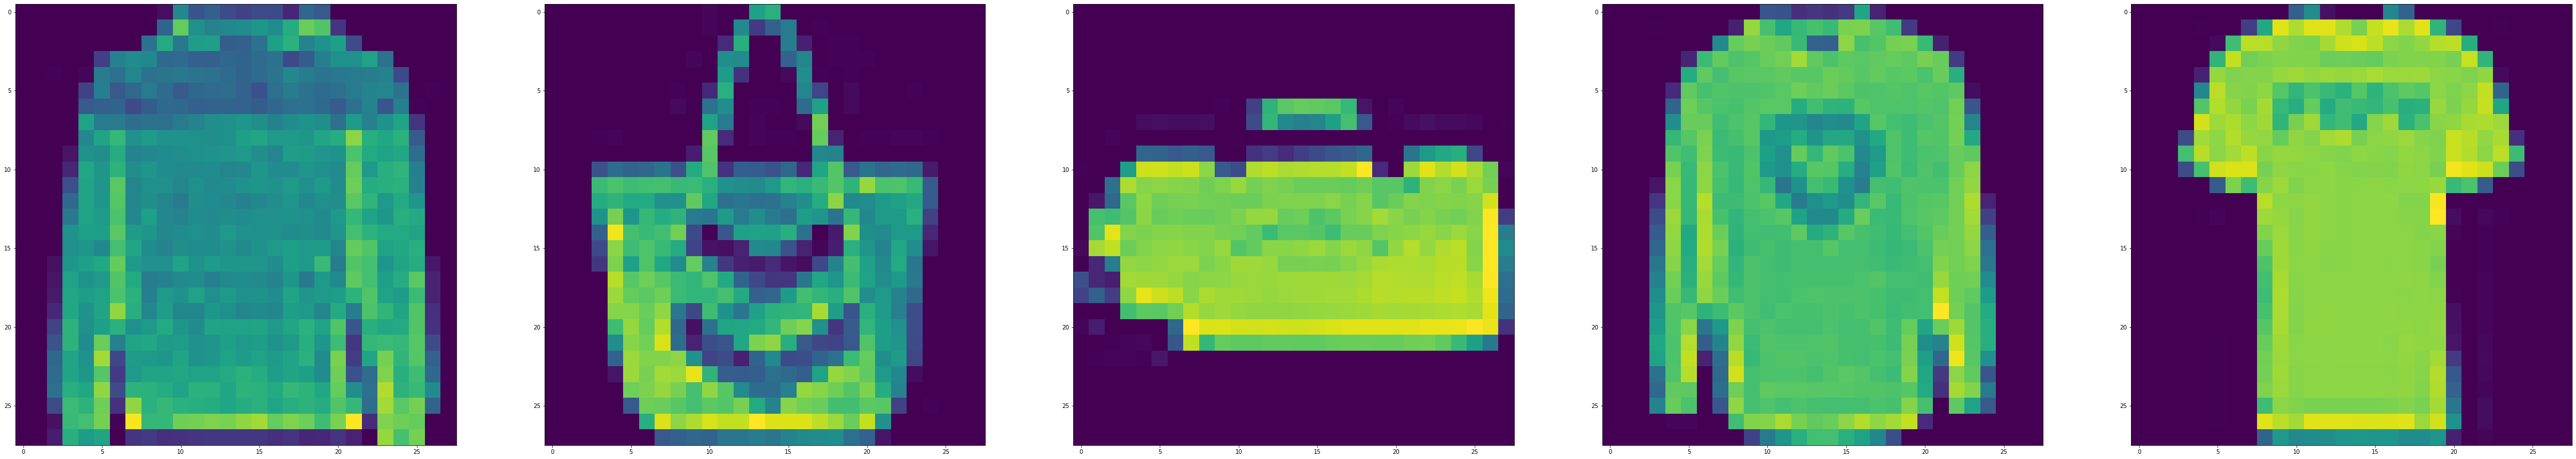

In [61]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

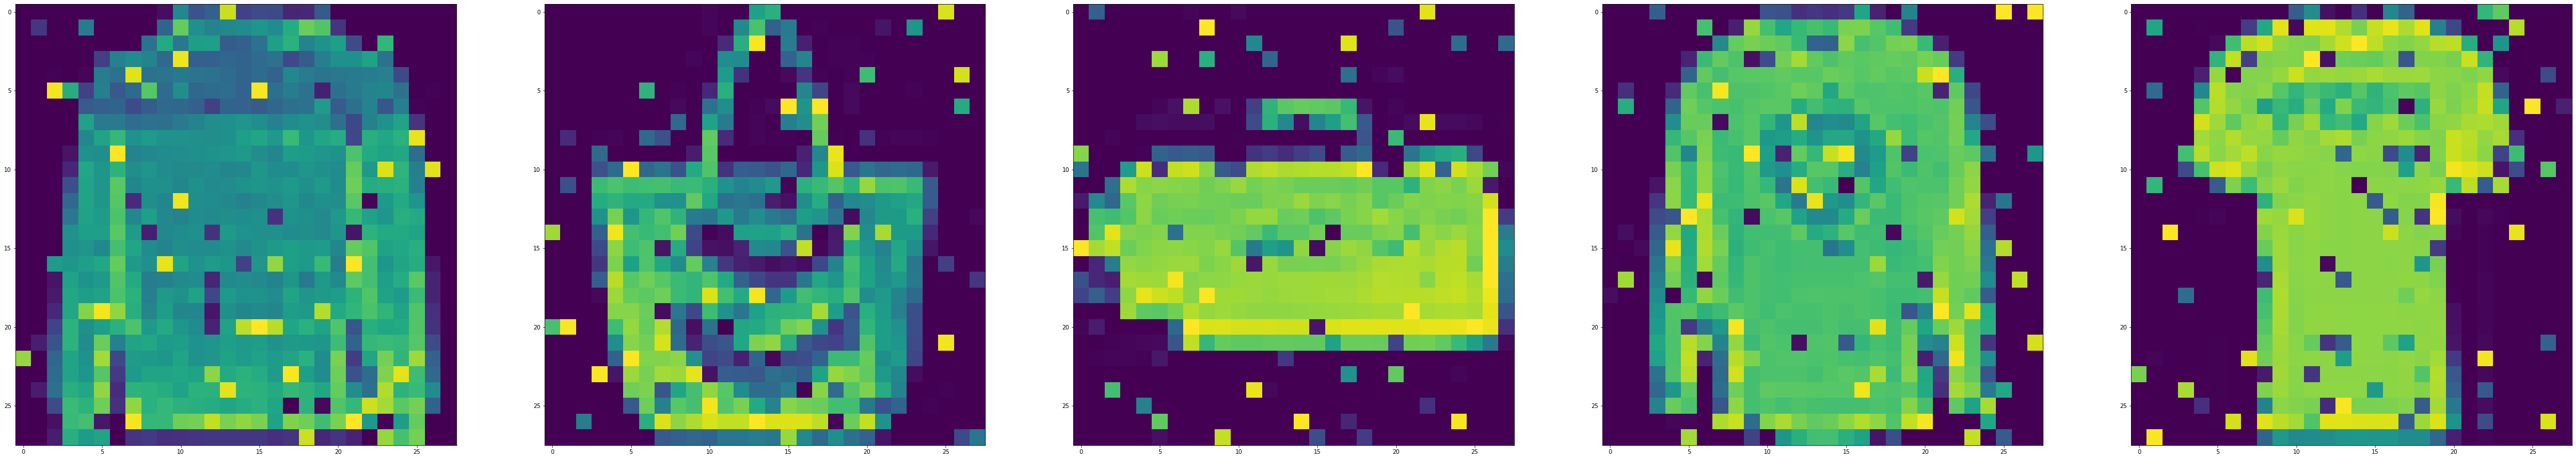

In [62]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
  ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

In [63]:
# input layer
input_layer = Input(shape=(28, 28, 1))
# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view = MaxPool2D( (2, 2), padding='same')(encoded_layer3)
# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer = Conv2D(1, (3, 3), padding='same')(decoded_layer3)
# compile the model
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [64]:
model_2.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 16)          0   

In [65]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=10, batch_size=2048, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Epoch 1/10
24/24 [==============================] - 7s 246ms/step - loss: 0.0936 - val_loss: 0.0539
Epoch 2/10
24/24 [==============================] - 6s 233ms/step - loss: 0.0453 - val_loss: 0.0382
Epoch 3/10
24/24 [==============================] - 6s 233ms/step - loss: 0.0353 - val_loss: 0.0322
Epoch 4/10
24/24 [==============================] - 6s 233ms/step - loss: 0.0304 - val_loss: 0.0283
Epoch 5/10
24/24 [==============================] - 6s 233ms/step - loss: 0.0271 - val_loss: 0.0257
Epoch 6/10
24/24 [==============================] - 6s 235ms/step - loss: 0.0248 - val_loss: 0.0238
Epoch 7/10
24/24 [==============================] - 6s 234ms/step - loss: 0.0238 - val_loss: 0.0228
Epoch 8/10
24/24 [==============================] - 6s 234ms/step - loss: 0.0225 - val_loss: 0.0219
Epoch 9/10
24/24 [==============================] - 6s 234ms/step - loss: 0.0217 - val_loss: 0.0212
Epoch 10/10
24/24 [==============================] - 6s 235ms/step - loss: 0.0211 - val_loss: 0.0207

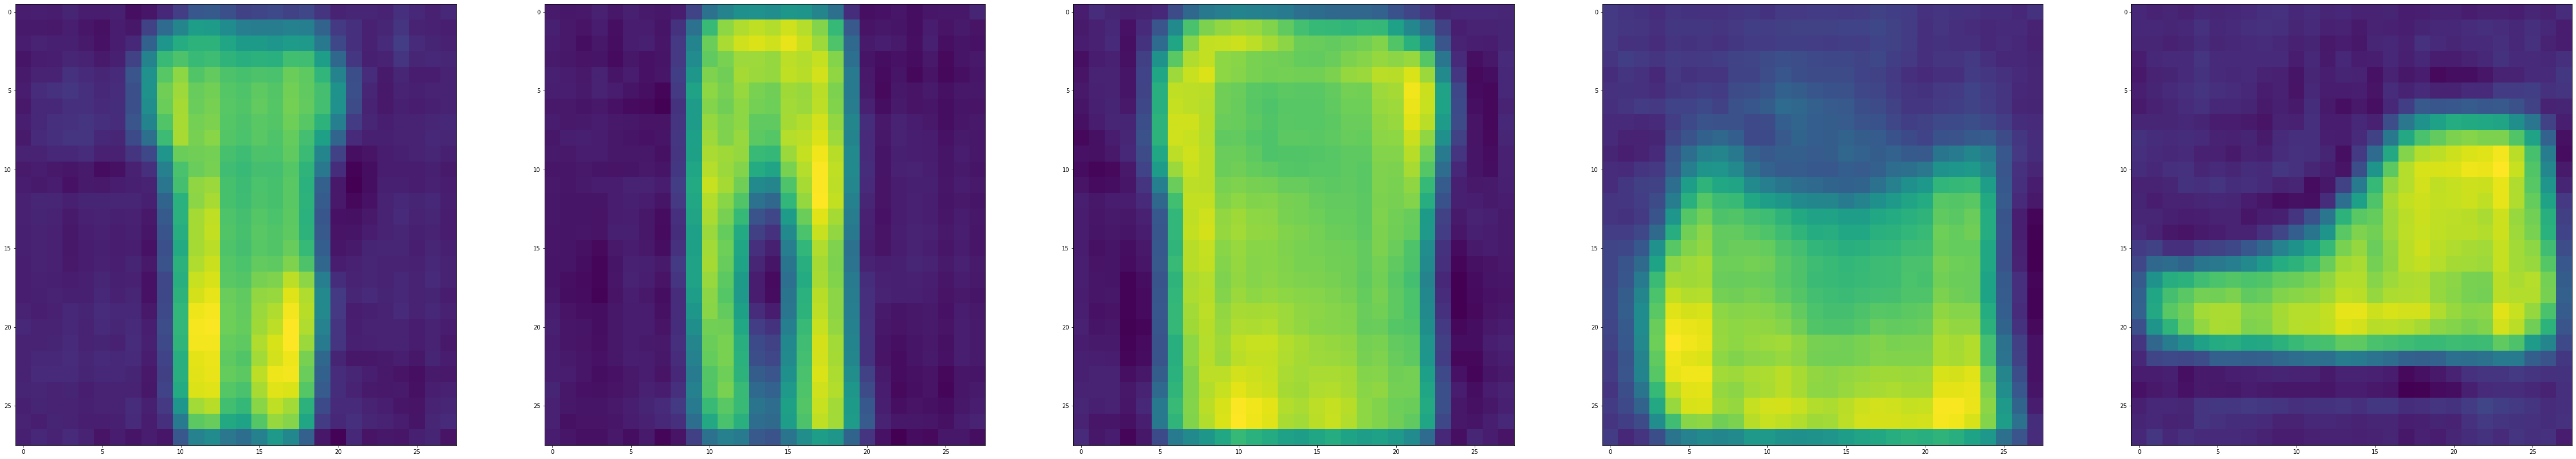

In [66]:
preds = model_2.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28,28))
plt.show()

In [67]:
# Lets add sample noise - Salt and Pepper
noise = augmenters.CoarseSaltAndPepper(p = 0.2, size_percent=0.8)
seq_object = augmenters.Sequential([noise])
train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

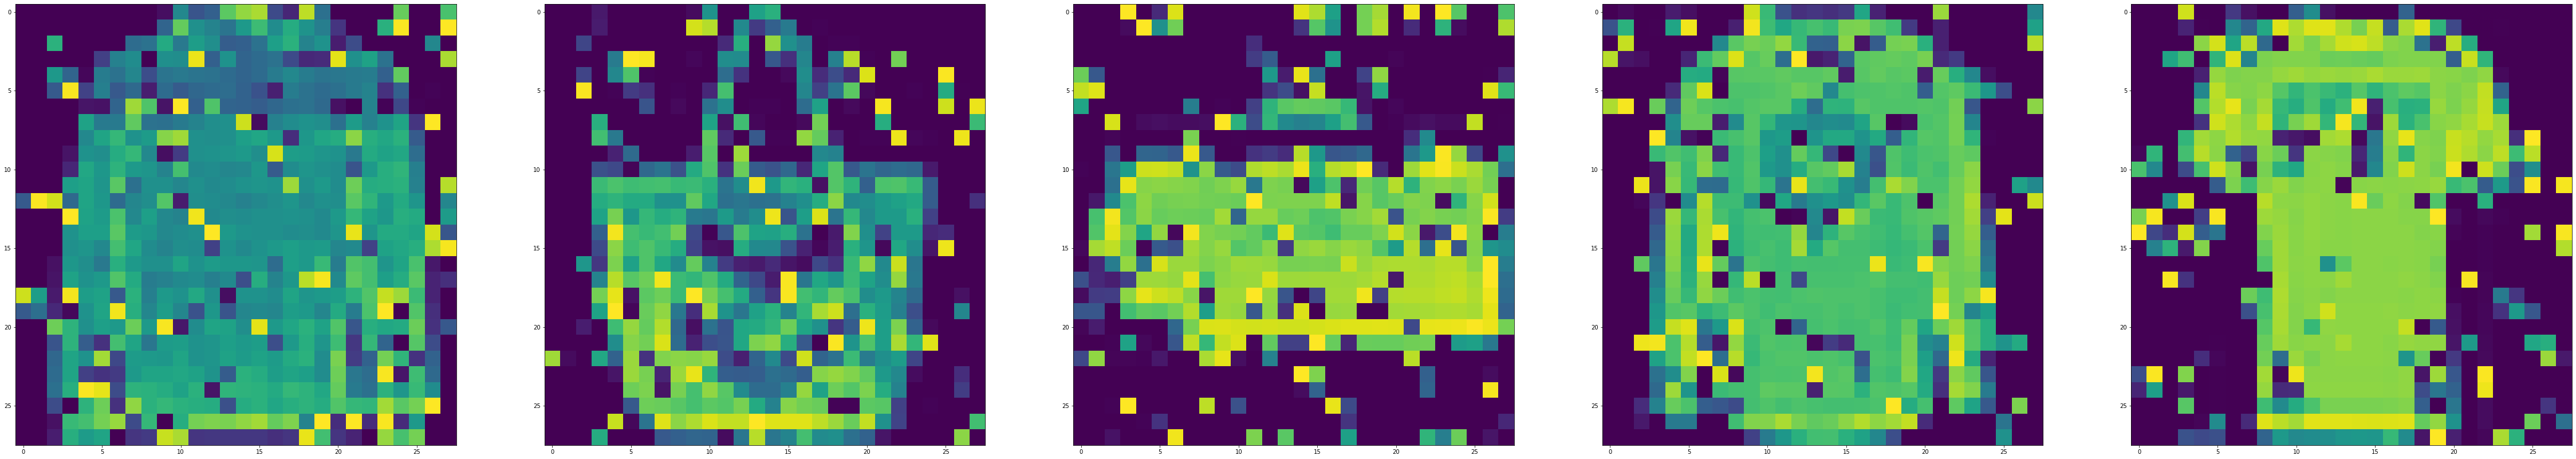

In [68]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

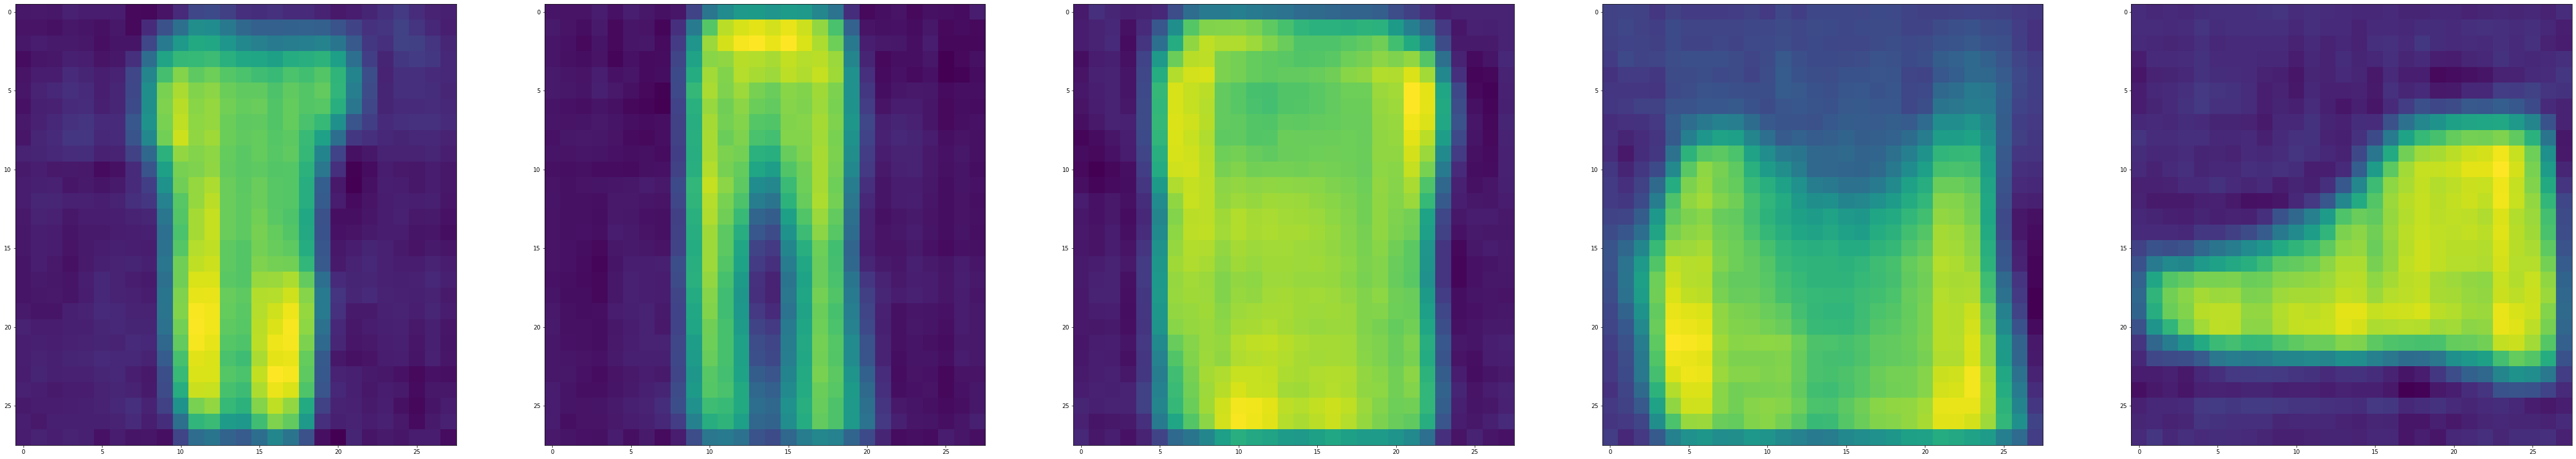

In [69]:
preds = model_2.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28,28))
plt.show()

In [70]:
### read dataset
train = pd.read_csv("/content/sample_data/mnist_test.csv")
##recreate the train_x array and val_x array
train_x = train[list(train.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)
## normalize and reshape
train_x = train_x/255. 
val_x = val_x/255. 

In [71]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

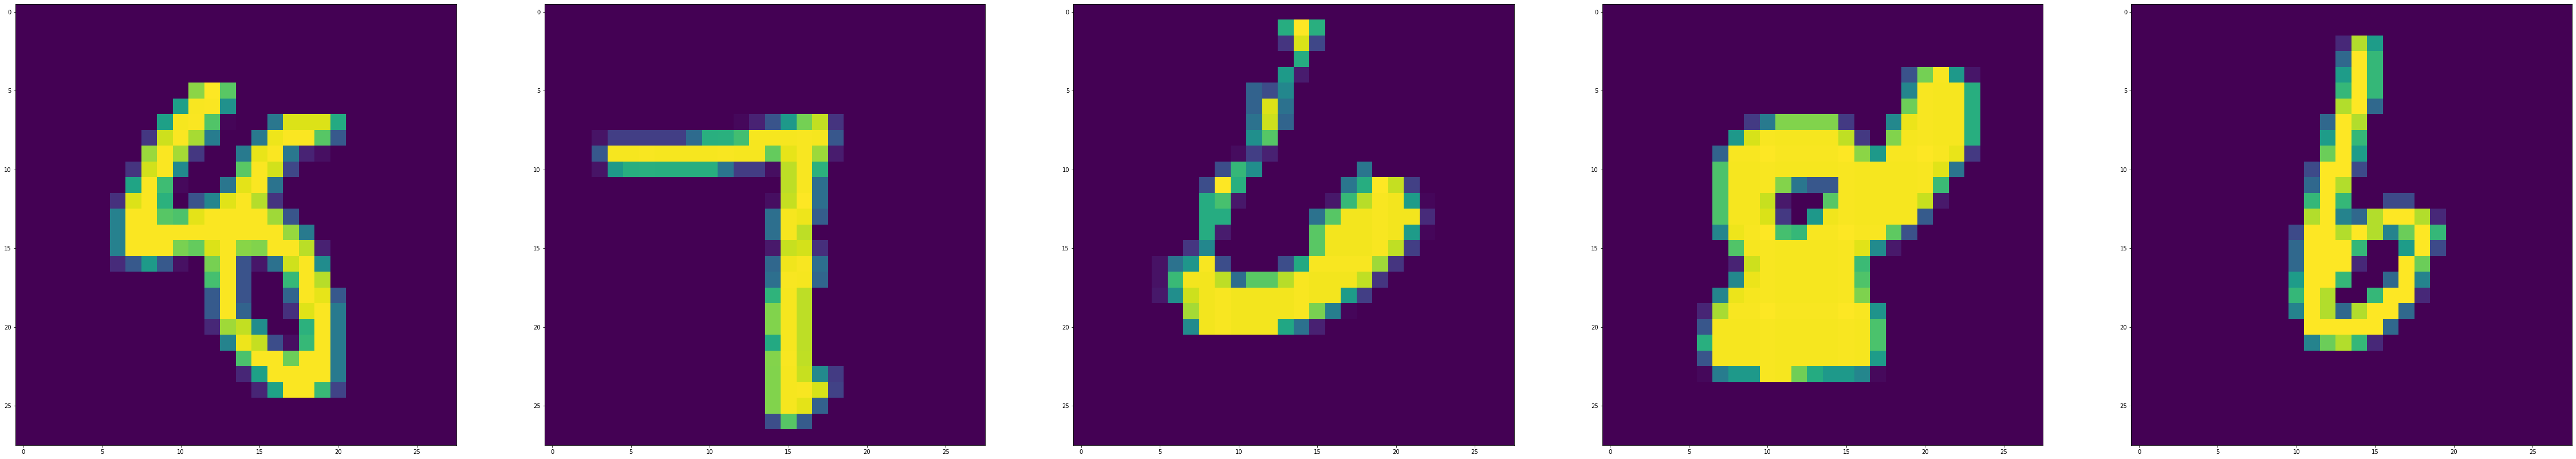

In [72]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

In [73]:
# input layer
input_layer = Input(shape=(28, 28, 1))
# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view = MaxPool2D( (2, 2), padding='same')(encoded_layer3)
# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer = Conv2D(1, (3, 3), padding='same')(decoded_layer3)
# compile the model
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

In [74]:
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 16)          0   

In [75]:
# Lets add sample noise
noise = augmenters.CoarseSaltAndPepper(p = 0.1, size_percent=0.8)
seq_object = augmenters.Sequential([noise])
train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

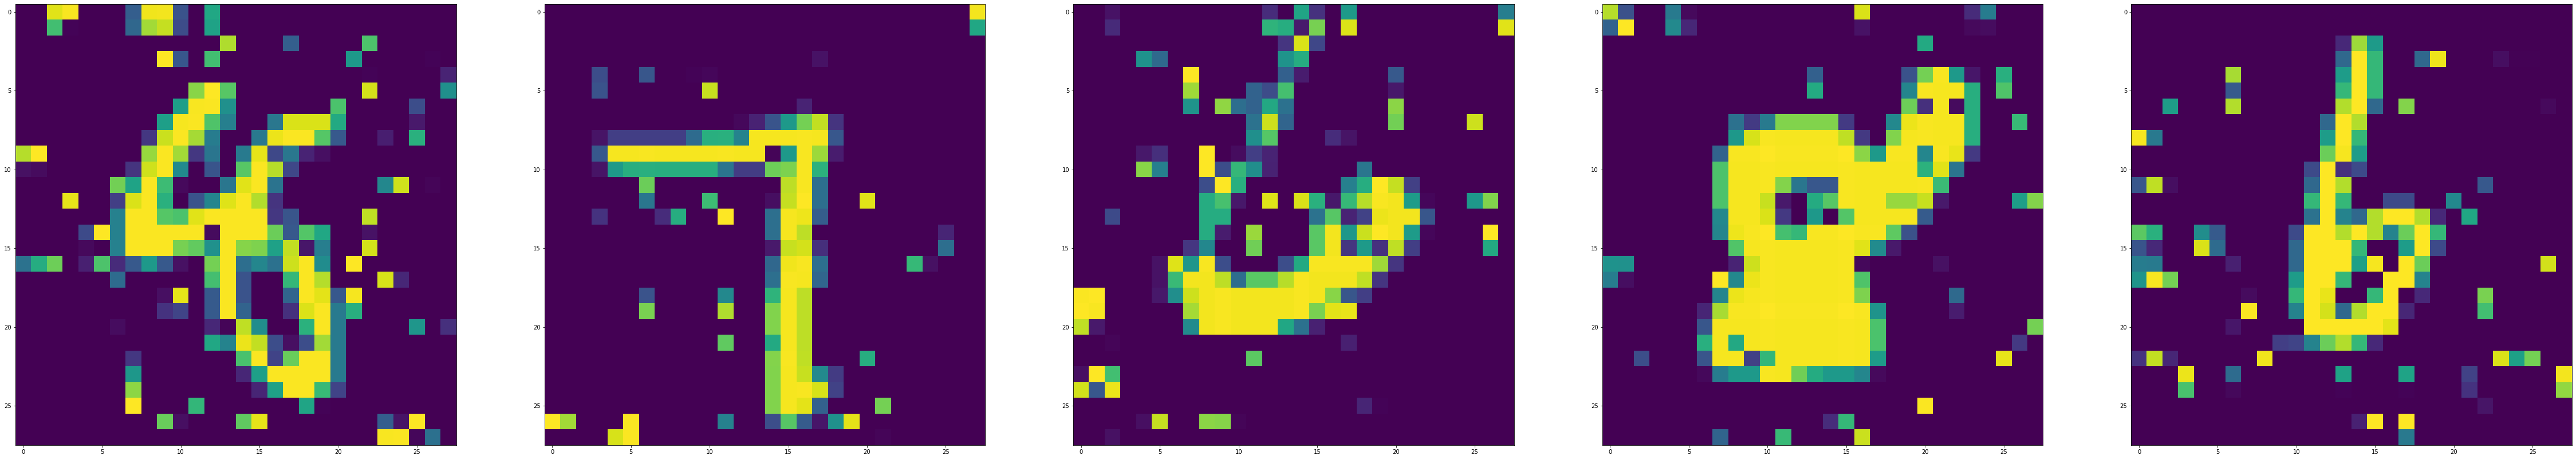

In [76]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

In [77]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = autoencoder.fit(train_x_n, train_x, epochs=10, batch_size=2048, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Epoch 1/10
4/4 [==============================] - 2s 317ms/step - loss: 0.0977 - val_loss: 0.0879
Epoch 2/10
4/4 [==============================] - 1s 251ms/step - loss: 0.0827 - val_loss: 0.0811
Epoch 3/10
4/4 [==============================] - 1s 242ms/step - loss: 0.0753 - val_loss: 0.0718
Epoch 4/10
4/4 [==============================] - 1s 247ms/step - loss: 0.0685 - val_loss: 0.0664
Epoch 5/10
4/4 [==============================] - 1s 241ms/step - loss: 0.0651 - val_loss: 0.0649
Epoch 6/10
4/4 [==============================] - 1s 244ms/step - loss: 0.0620 - val_loss: 0.0611
Epoch 7/10
4/4 [==============================] - 1s 245ms/step - loss: 0.0592 - val_loss: 0.0589
Epoch 8/10
4/4 [==============================] - 1s 245ms/step - loss: 0.0570 - val_loss: 0.0563
Epoch 9/10
4/4 [==============================] - 1s 246ms/step - loss: 0.0545 - val_loss: 0.0540
Epoch 10/10
4/4 [==============================] - 1s 241ms/step - loss: 0.0522 - val_loss: 0.0515


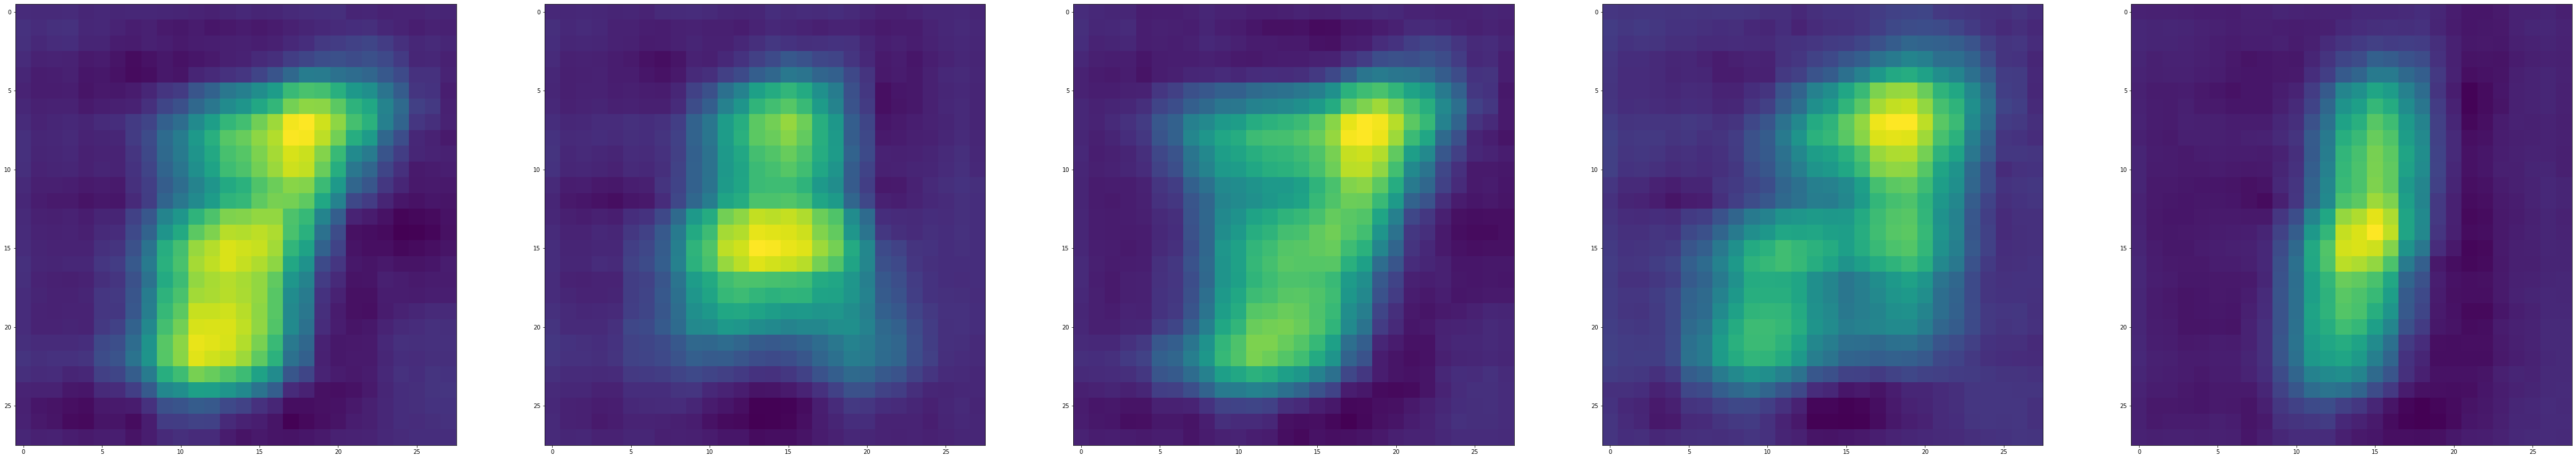

In [78]:
preds = autoencoder.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28,28))
plt.show()

In [79]:
# input layer
input_layer = Input(shape=(28, 28, 1))
# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view = MaxPool2D( (2, 2), padding='same')(encoded_layer3)
# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(64, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer = Conv2D(1, (3, 3), padding='same')(decoded_layer3)
# compile the model
autoencoder2 = Model(input_layer, output_layer)
autoencoder2.compile(optimizer='adam', loss='mse')

In [80]:
autoencoder2.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 7, 7, 16)          9232      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 16)          0   

In [81]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history2 = autoencoder2.fit(train_x_n, train_x, epochs=20, batch_size=1024, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Epoch 1/20
8/8 [==============================] - 2s 181ms/step - loss: 0.0992 - val_loss: 0.0881
Epoch 2/20
8/8 [==============================] - 1s 140ms/step - loss: 0.0829 - val_loss: 0.0772
Epoch 3/20
8/8 [==============================] - 1s 139ms/step - loss: 0.0696 - val_loss: 0.0648
Epoch 4/20
8/8 [==============================] - 1s 139ms/step - loss: 0.0624 - val_loss: 0.0602
Epoch 5/20
8/8 [==============================] - 1s 139ms/step - loss: 0.0568 - val_loss: 0.0545
Epoch 6/20
8/8 [==============================] - 1s 140ms/step - loss: 0.0514 - val_loss: 0.0500
Epoch 7/20
8/8 [==============================] - 1s 141ms/step - loss: 0.0479 - val_loss: 0.0468
Epoch 8/20
8/8 [==============================] - 1s 140ms/step - loss: 0.0450 - val_loss: 0.0446
Epoch 9/20
8/8 [==============================] - 1s 140ms/step - loss: 0.0425 - val_loss: 0.0422
Epoch 10/20
8/8 [==============================] - 1s 140ms/step - loss: 0.0403 - val_loss: 0.0401
Epoch 11/20
8/8 [==

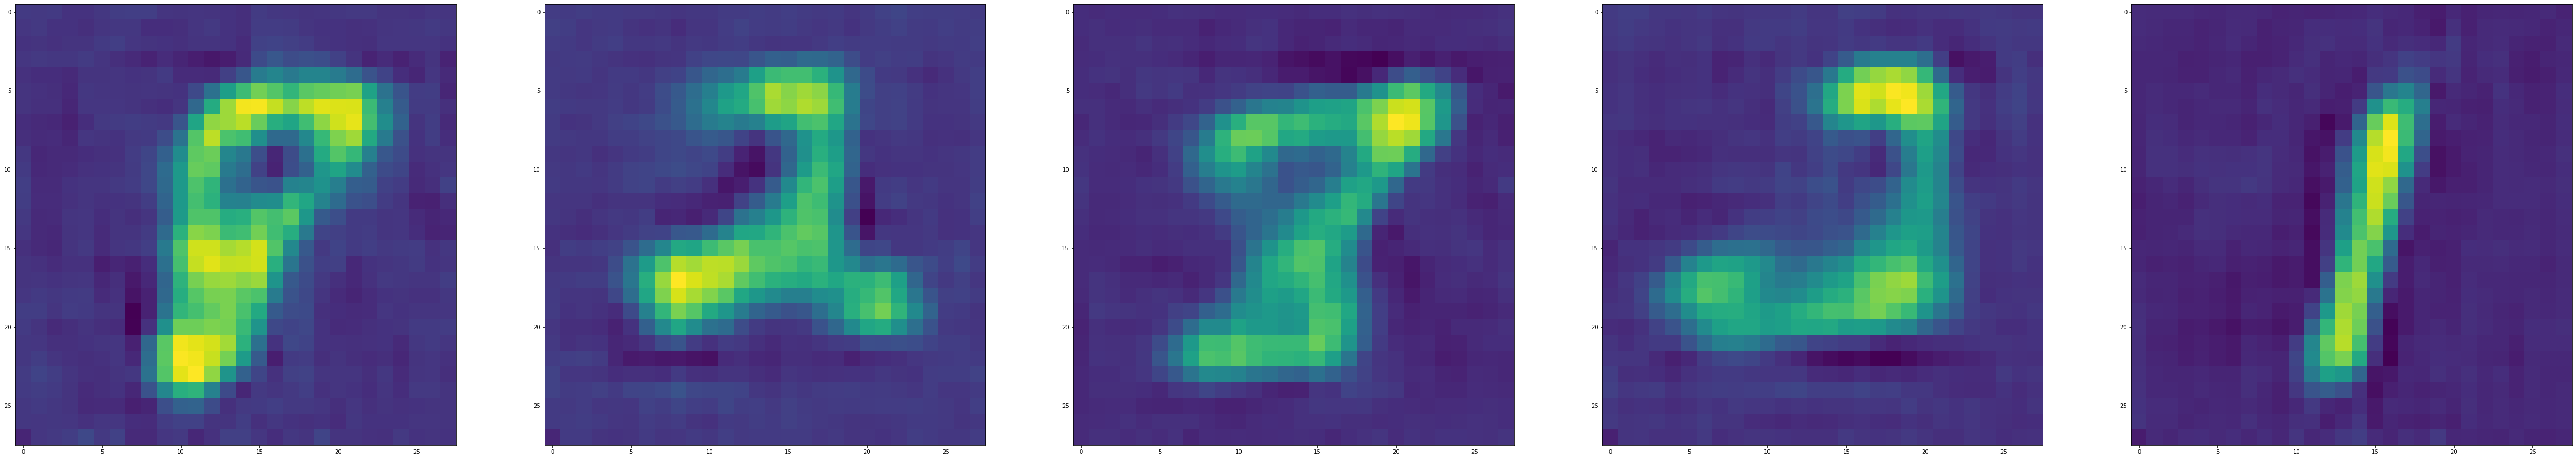

In [82]:
preds = autoencoder2.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28,28))
plt.show()

In [83]:
# input layer
input_layer = Input(shape=(28, 28, 1))
# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view = MaxPool2D( (2, 2), padding='same')(encoded_layer3)
# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer = Conv2D(1, (3, 3), padding='same')(decoded_layer3)
# compile the model
autoencoder3 = Model(input_layer, output_layer)
autoencoder3.compile(optimizer='adam', loss='mse')

In [84]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=5, mode='auto')
history2 = autoencoder3.fit(train_x_n, train_x, epochs=10, batch_size=128, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Epoch 1/10
63/63 [==============================] - 2s 25ms/step - loss: 0.0623 - val_loss: 0.0455
Epoch 2/10
63/63 [==============================] - 1s 21ms/step - loss: 0.0380 - val_loss: 0.0331
Epoch 3/10
63/63 [==============================] - 1s 21ms/step - loss: 0.0293 - val_loss: 0.0270
Epoch 4/10
63/63 [==============================] - 1s 20ms/step - loss: 0.0249 - val_loss: 0.0241
Epoch 5/10
63/63 [==============================] - 1s 21ms/step - loss: 0.0224 - val_loss: 0.0216
Epoch 6/10
63/63 [==============================] - 1s 21ms/step - loss: 0.0206 - val_loss: 0.0205
Epoch 7/10
63/63 [==============================] - 1s 21ms/step - loss: 0.0193 - val_loss: 0.0193
Epoch 8/10
63/63 [==============================] - 1s 21ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 9/10
63/63 [==============================] - 1s 21ms/step - loss: 0.0175 - val_loss: 0.0175
Epoch 10/10
63/63 [==============================] - 1s 21ms/step - loss: 0.0167 - val_loss: 0.0171


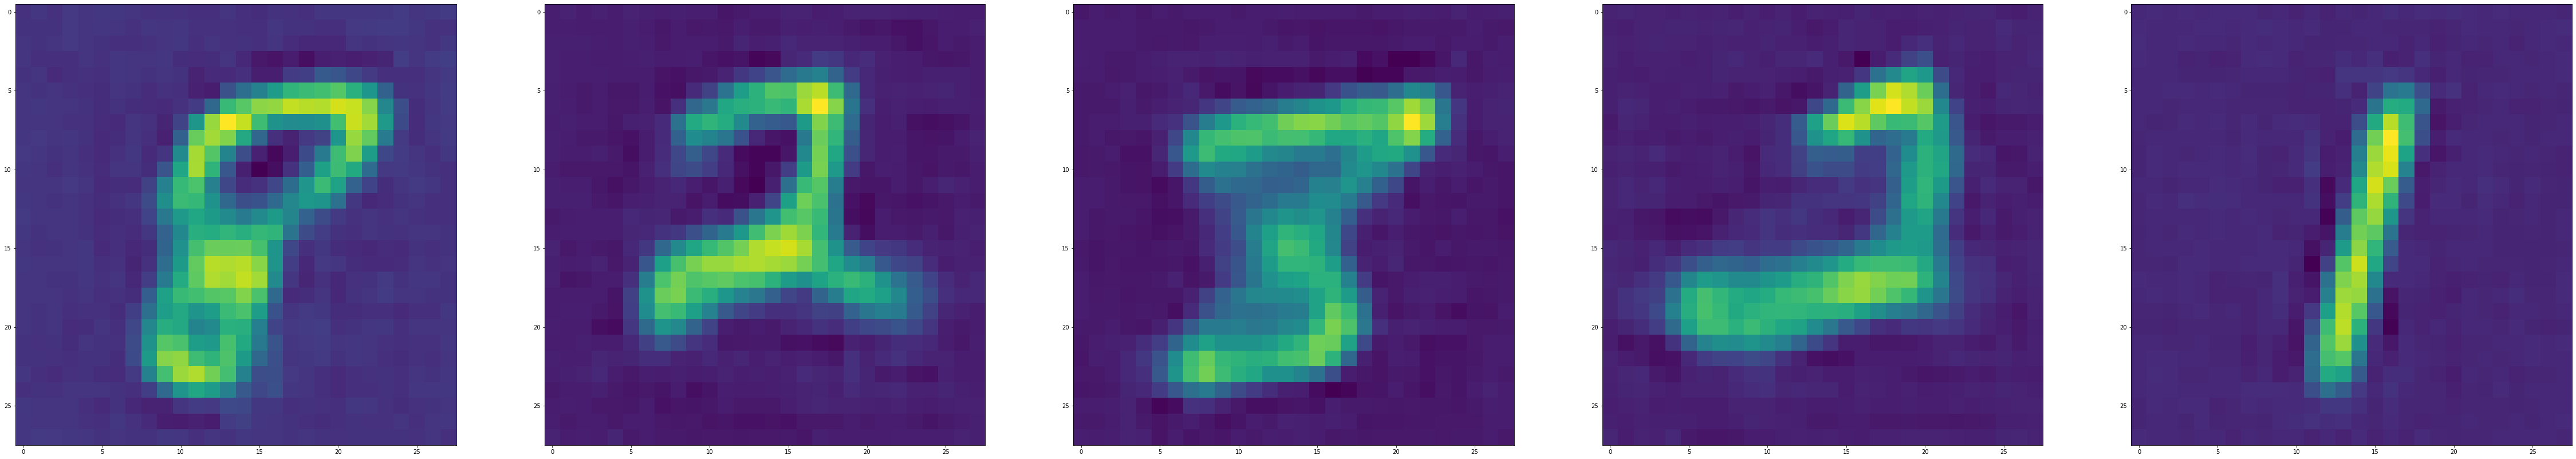

In [85]:
preds = autoencoder3.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28,28))
plt.show()

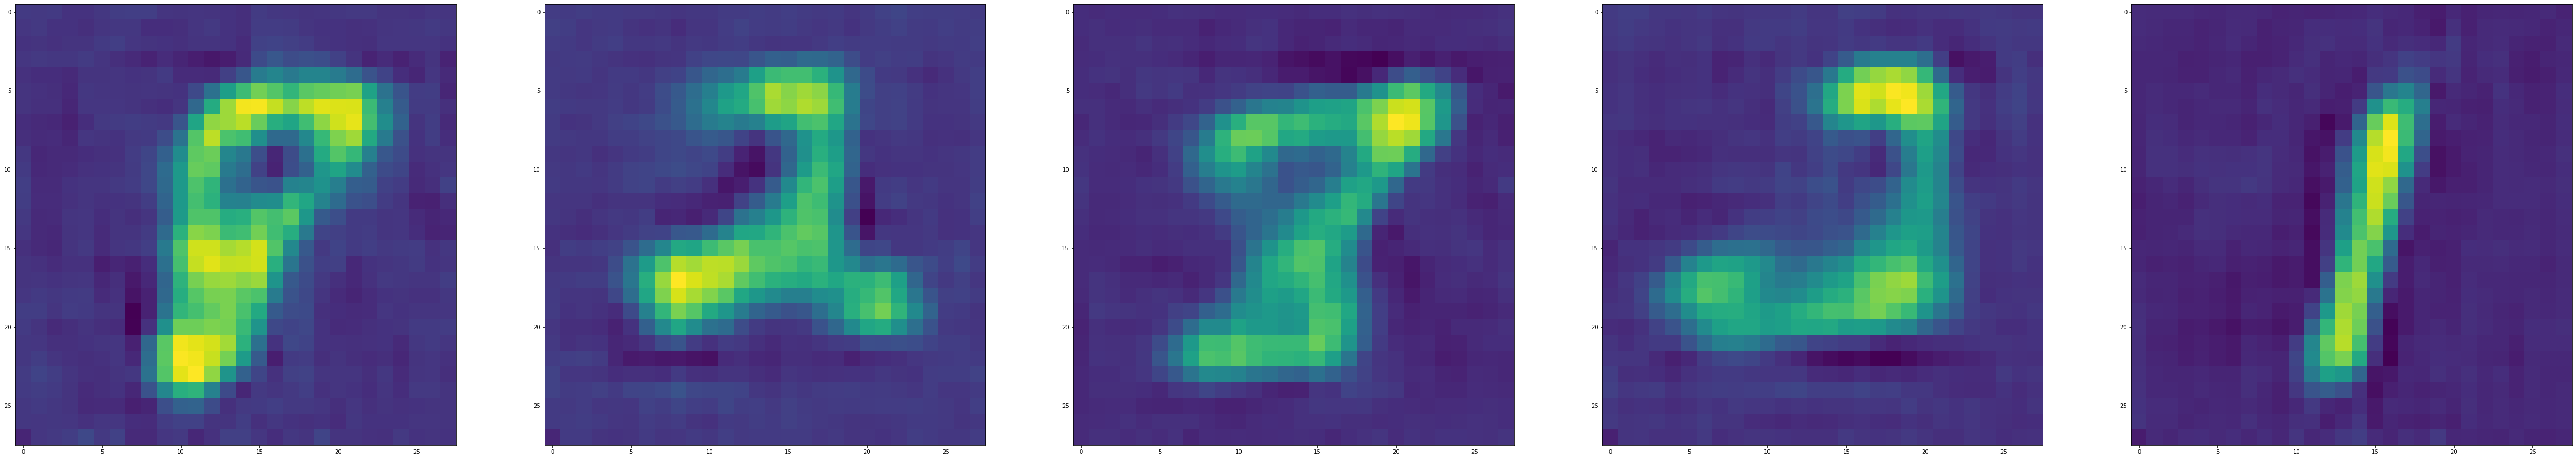

In [86]:
preds = autoencoder2.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28,28))
plt.show()